<a href="https://colab.research.google.com/github/Kashishkewat/machine-learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline

In [5]:
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)
#y=0.8x^2 +0.9x +2

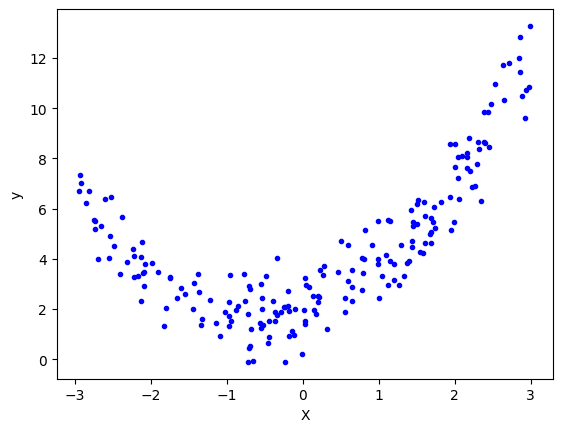

In [8]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
#

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)
#

0.42217968176401

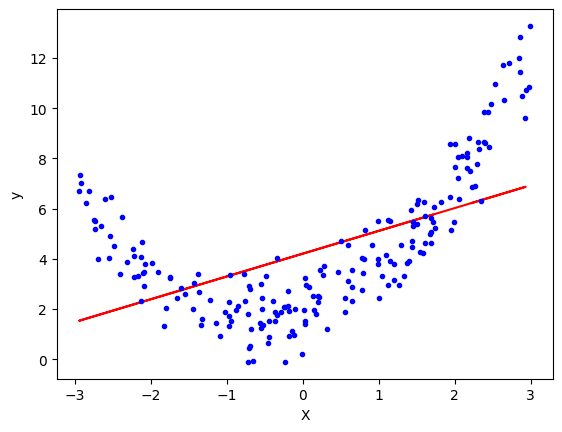

In [13]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,"b.")
plt.xlabel('X')
plt.ylabel('y')
plt.show()
#

In [17]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.fit_transform(X_test)

In [18]:
print(X_train[0])
print(X_train_trans[0])

[1.70939636]
[1.         1.70939636 2.9220359 ]


In [19]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(X_test_trans)
r2_score(y_test,y_pred)
#

0.8894545094040736

In [21]:
lr.coef_

array([[0.        , 0.84412226, 0.82349917]])

In [22]:
lr.intercept_

array([1.9579881])

In [23]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)

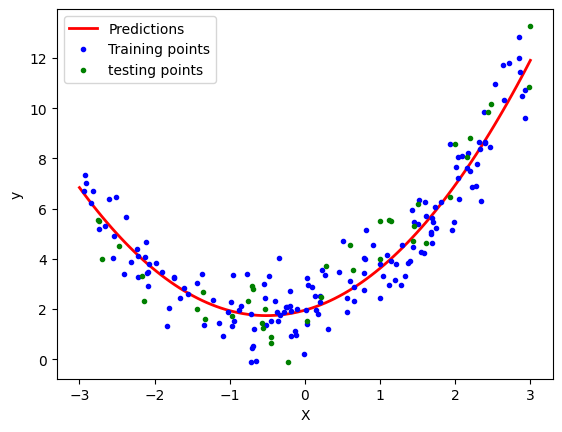

In [24]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,y_train,"b.",label="Training points")
plt.plot(X_test,y_test,"g.",label='testing points')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()
#

In [25]:
#3D polynomial regression
x=7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8
z=x**2 +y**2+0.2*x+0.2*y+0.1*x*y+2+np.random.randn(100,1)
#z=x^2+y^2+0.2x+0.2y+0.1xy+2

In [27]:
import plotly.express as px
import pandas as pd

# Create a DataFrame from the custom x, y, z data
df_custom = pd.DataFrame({
    'x': x.ravel(),
    'y': y.ravel(),
    'z': z.ravel()
})

fig = px.scatter_3d(df_custom, x='x', y='y', z='z')
fig.show()

In [32]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)
x_input=np.linspace(x.min(),x.max(),10)
y_input=np.linspace(y.min(),y.max(),10)
xGrid,yGrid=np.meshgrid(x_input,y_input)
final=np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final=lr.predict(final).reshape(10,10
                                 )

In [34]:
import plotly.graph_objects as go
fig=px.scatter_3d(df_custom,x='x',y='y',z='z')
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()

In [35]:
X_multi=np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [41]:
ploy=PolynomialFeatures(degree=2,include_bias=True)
X_multi_trans=ploy.fit_transform(X_multi)


In [42]:
print("Input",ploy.n_features_in_)
print("Output",ploy.n_output_features_)
print("Power\n",ploy.powers_)

Input 2
Output 6
Power
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [43]:
X_multi_trans.shape

(100, 6)

In [44]:
lr=LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [45]:
X_test_trans=ploy.transform(final)


In [46]:
z_final=lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig=px.scatter_3d(df_custom,x='x',y='y',z='z')

In [47]:
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))
fig.show()